# Introduction

The proposed project, titled "Lagos state house pricing model", seeks to address a pressing issue within the Lagos real estate market. This project is pivotal as it aims to provide an AI-driven solution for precisely predicting building prices. By doing so, it empowers buyers, sellers, and real estate professionals with data-driven insights to make informed decisions.

The primary challenge at hand is the unpredictable nature of building prices in Lagos, Nigeria. The real estate market is subject to various factors, making it arduous for stakeholders to accurately estimate property values. As Ayodele and Olaleye (2022) emphasized, this complexity makes precise predictions a formidable task.

Source
https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import MeanAbsoluteError
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_csv('nigeria_houses_data.csv')

# Data Cleaning and Preprocessing

In [3]:
#Displaying summary statistics of the dataset
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [4]:
# Checking for missing values in the dataset using isnull() and sum()

data.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [5]:

data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [6]:
# Converting specific columns to the 'int64' data type

data[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']] = data[['bedrooms', 'bathrooms', 'toilets', 
                                                                             'parking_space', 'price']].astype('int64')

In [7]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000


In [8]:
# Retrieve the unique values in the 'title' column of the DataFrame

data.title.unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [9]:
# Retrieve the unique values in the 'title' column of the DataFrame

data.town.unique().size

189

In [10]:
data.shape

(24326, 8)

In [11]:
#Extracting Lagos dataset
df = data[(data['state'] =='Lagos')]

#creating a list of the categorical features
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
cat_cols

['title', 'town', 'state']

In [13]:
#use onehotencoding to preprocess and encode the cat features
title_dm= pd.get_dummies(df['title'])
town_dm =pd.get_dummies(df['town'])
features_dm = df.drop(['title', 'town', 'state'], axis=1)

df_1 = pd.concat([features_dm, title_dm, town_dm], axis=1)

In [14]:
df_1['ID'] = range(1, len(df_1) + 1)

# Set the 'ID' column as the index
df_1.set_index('ID', inplace=True)

df_1.head()

,bedrooms,bathrooms,toilets,parking_space,price,Block of Flats,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,...,Ojo,Ojodu,Ojota,Oke-Odo,Orile,Oshodi,Shomolu,Surulere,Victoria Island (VI),Yaba
ID,,,,,,,,,,,,,,,,,,,,,
1,4,5,5,4,120000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,4,5,6,40000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,4,5,2,75000000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,5,6,1,450000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4,5,5,4,65000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_1.shape

(18445, 60)

In [16]:
#Defining the features and target variables

target = df_1.price
features = df_1.drop('price', axis=1)
features.shape

(18445, 59)

In [17]:
# Splittng the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [18]:
#creating the validation sets

X_val = X_train.sample(frac=0.2, random_state=0)
y_val = y_train.sample(frac=0.2, random_state=0)

In [57]:

# Create a StandardScaler for the input features (X)
scaler_X = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler_X.fit_transform(X_train)

# Transform the testing and validation sets using the same scaler
X_val_scaled = scaler_X.transform(X_val)

# Creating a StandardScaler for the target variable
scaler_y = StandardScaler()
# Fit and transform the training set target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Transform the testing and validation sets target variable using the same scaler
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

import pickle

pickle.dump(scaler_X, open('scaler_x', 'wb'))
pickle.dump(scaler_y, open('scaler_y', 'wb'))

# Visualization

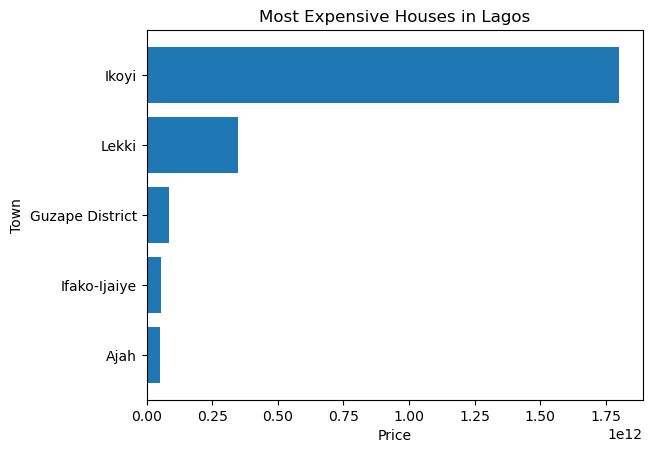

In [20]:
# Sorting the data by 'price' in descending order and select the top 10
data_sorted = data.sort_values(by='price', ascending=False).head(10)

# Extracting 'town' and 'price' columns
town= data_sorted['town']
price = data_sorted['price']

# Creating a horizontal bar chart showing the most expensive houses in lagos and their locations
plt.barh(town, price)
plt.xlabel('Price')
plt.ylabel('Town')
plt.title('Most Expensive Houses in Lagos')
plt.gca().invert_yaxis()
plt.show()

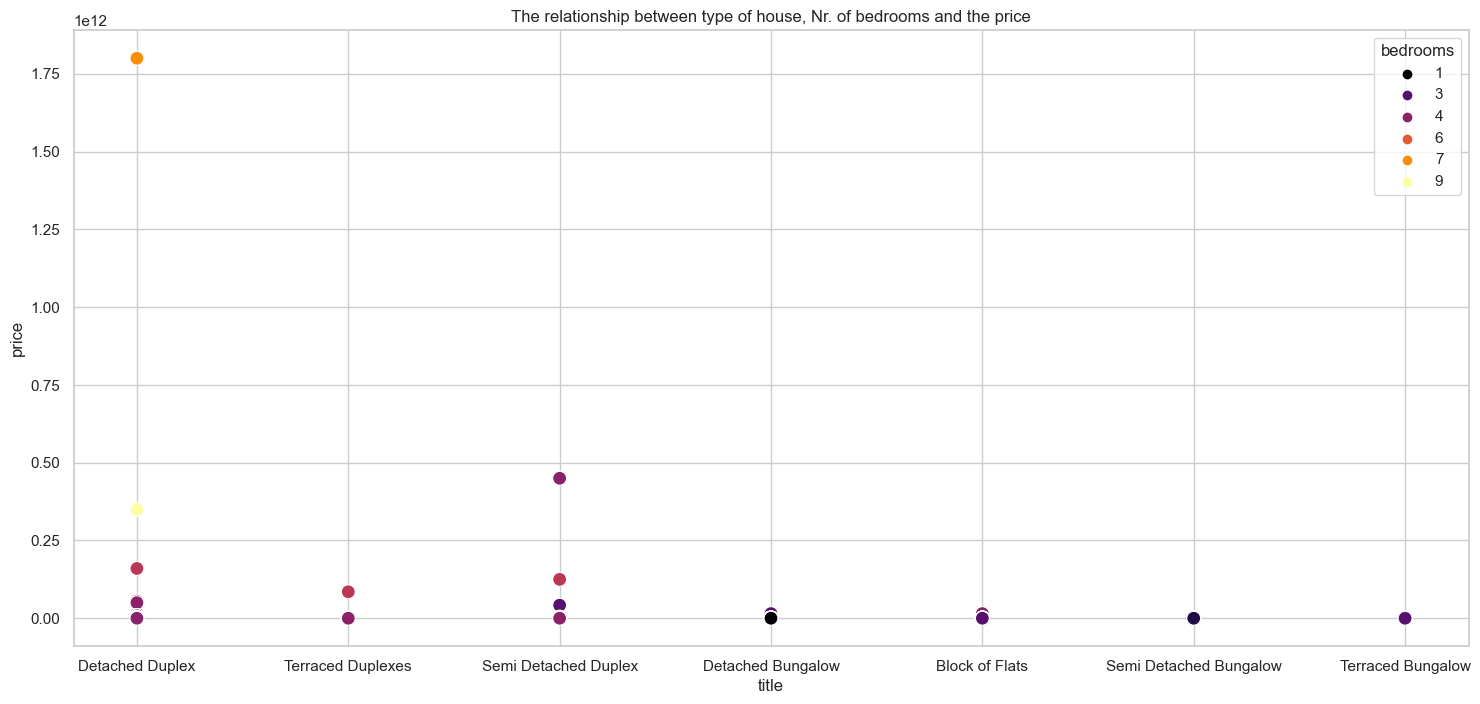

In [21]:
# Setting Seaborn style to whitegrid
sns.set(style='whitegrid')

# Creating a scatter plot using Seaborn
plt.figure(figsize=(18, 8))
sns.scatterplot(x= 'title', y ='price', hue='bedrooms', data =data, palette='inferno', s=100)
plt.title('The relationship between type of house, Nr. of bedrooms and the price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16372\2290337363.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'bedrooms', y ='price', data =data, palette='inferno', s=100)
C:\Users\user\AppData\Local\Temp\ipykernel_16372\2290337363.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'bathrooms', y ='price', data =data, palette='inferno', s=100)


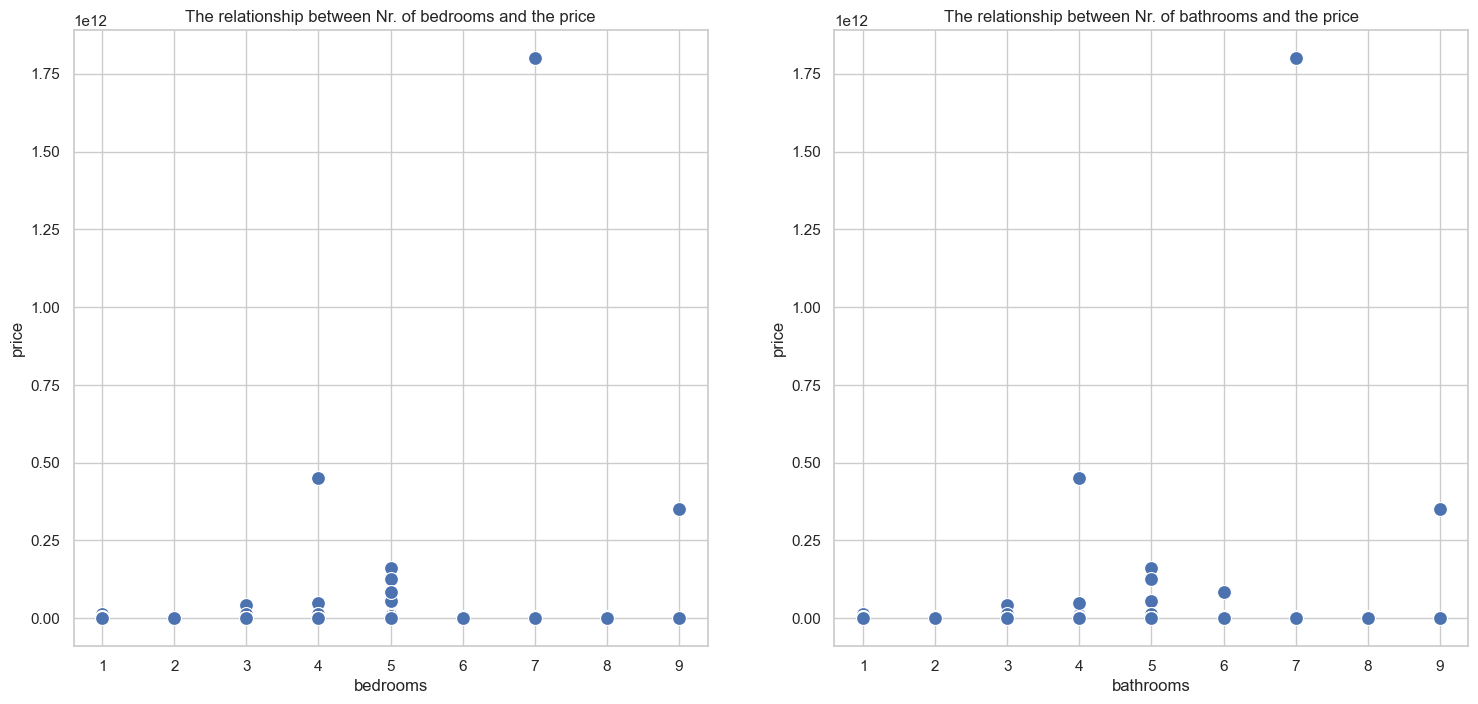

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x= 'bedrooms', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of bedrooms and the price')

plt.subplot(1, 2, 2)
sns.scatterplot(x= 'bathrooms', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of bathrooms and the price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16372\667205350.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'toilets', y ='price', data =data, palette='inferno', s=100)
C:\Users\user\AppData\Local\Temp\ipykernel_16372\667205350.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'parking_space', y ='price', data =data, palette='inferno', s=100)


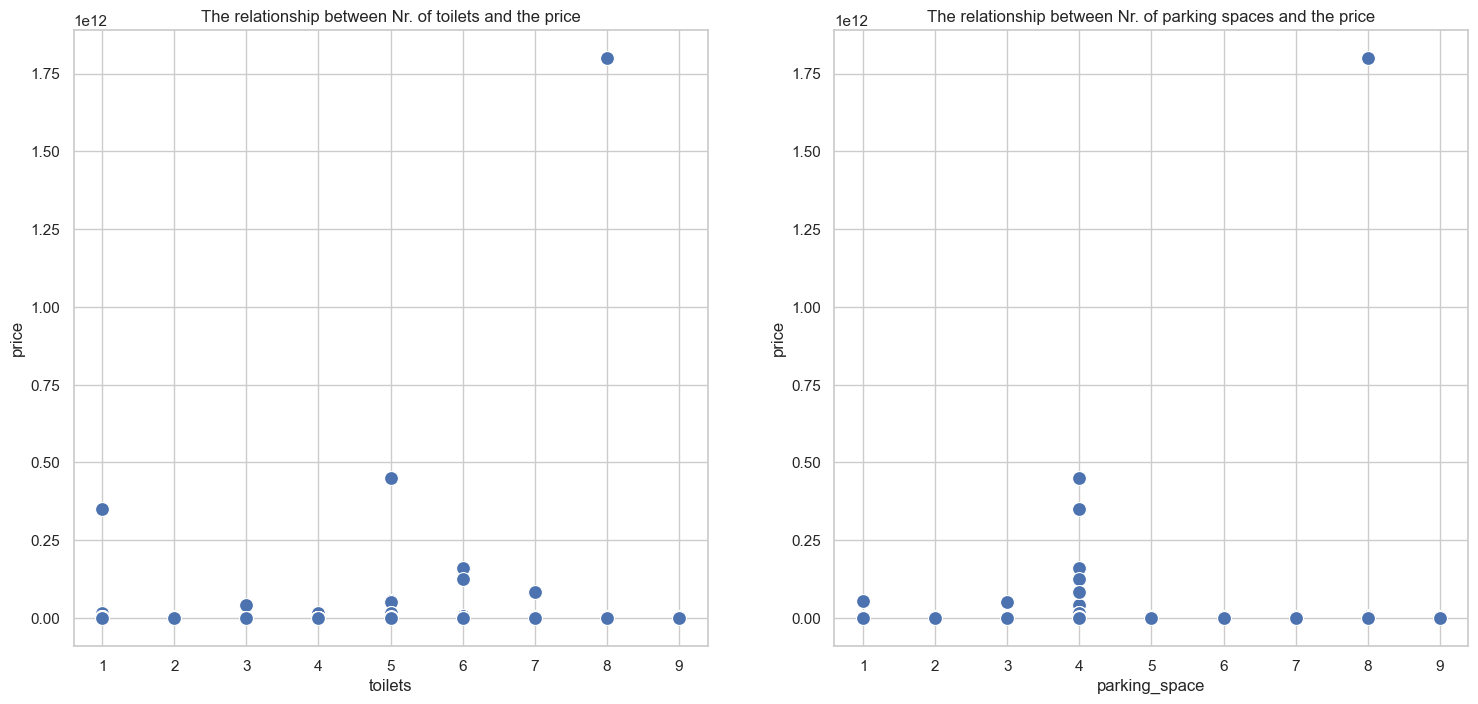

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x= 'toilets', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of toilets and the price')

plt.subplot(1, 2, 2)
sns.scatterplot(x= 'parking_space', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of parking spaces and the price')
plt.show()

# Summary of the Visualization

Looking at the plots, it appears that in Lagos state, the location of a house is the primary variable that influences its price. Number of bedrooms, bathrooms, toilets and parking spaces are only intervening variables.

# Training Model 1

In [24]:
#Defining the model
model = Sequential([
    Dense(units= 128, input_shape= (X_train_scaled.shape[1],), activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(1, activation='linear')
])

In [25]:
#Compiling the model
optimizer= Adam(learning_rate= 0.001)
model.compile(optimizer=optimizer, loss=MeanAbsoluteError())

In [26]:
#fitting/training the model
model_history = model.fit(X_train_scaled, y_train_scaled, batch_size=56, epochs=500, 
                          verbose=0, validation_data=(X_val_scaled, y_val_scaled))

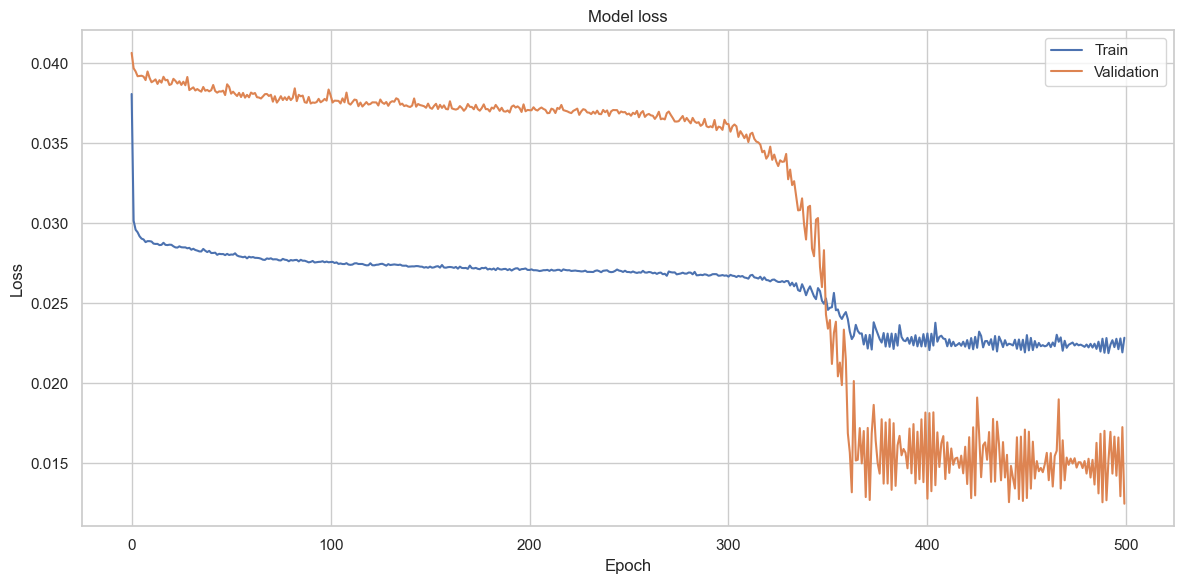

In [27]:
#Visualizing the training and validation losses

model_history_df = pd.DataFrame(model_history.history)


plt.figure(figsize=(12, 6))

# Plot training & validation loss values

plt.plot(model_history_df['loss'], label='Train')
plt.plot(model_history_df['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
#making predictions with the model
def make_pred(input):
    input_scaled = scaler_X.transform(input)
    y_pred = model.predict(input_scaled)
    y_pred_unscaled = scaler_y.inverse_transform(y_pred).flatten()
    return y_pred_unscaled.astype('int64')

In [29]:
y_preds = make_pred(X_test)

116/116 [==============================] - 0s 2ms/step


# X_test.columns

In [32]:
all_states = ['osun', 'lagos', 'niger']
all_house_types = ['duplex', 'bungalow', 'detached house']

# Simulating the selected state and house type from the form
selected_state = 'lagos'
selected_house_type = 'bungalow'

# Create a dictionary with boolean values
data = {state: state == selected_state for state in all_states}
data.update({house_type: house_type == selected_house_type for house_type in all_house_types})

# Convert the dictionary to a DataFrame
df = pd.DataFrame([data])

# Display the DataFram
df

,osun,lagos,niger,duplex,bungalow,detached house
0,False,True,False,False,True,False


In [42]:
X_test.head(1)

,bedrooms,bathrooms,toilets,parking_space,Block of Flats,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,...,Ojo,Ojodu,Ojota,Oke-Odo,Orile,Oshodi,Shomolu,Surulere,Victoria Island (VI),Yaba
ID,,,,,,,,,,,,,,,,,,,,,
2201,5,5,6,6,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
y_test_array = np.array(y_test)

In [47]:
slot_numbers = ['bedrooms', 'bathrooms', 'toilets', 'parking_space']

towns = ['Agbara-Igbesa', 'Agege', 'Ajah', 'Alimosho', 'Amuwo Odofin', 'Apapa',
       'Ayobo', 'Badagry', 'Egbe', 'Ejigbo', 'Eko Atlantic City', 'Epe',
       'Gbagada', 'Ibeju', 'Ibeju Lekki', 'Idimu', 'Ifako-Ijaiye', 'Ijaiye',
       'Ijede', 'Ijesha', 'Ikeja', 'Ikorodu', 'Ikotun', 'Ikoyi', 'Ilupeju',
       'Imota', 'Ipaja', 'Isheri', 'Isheri North', 'Isolo', 'Ketu', 'Kosofe',
       'Lagos Island', 'Lekki', 'Magodo', 'Maryland', 'Mushin', 'Ogudu', 'Ojo',
       'Ojodu', 'Ojota', 'Oke-Odo', 'Orile', 'Oshodi', 'Shomolu', 'Surulere',
       'Victoria Island (VI)', 'Yaba']

building_types = ['Block of Flats', 'Detached Bungalow', 'Detached Duplex',
       'Semi Detached Bungalow', 'Semi Detached Duplex', 'Terraced Bungalow',
       'Terraced Duplexes']



def create_dataframe(input_list):
    data = {'bedrooms':input_list['bedrooms'], 'bathrooms':input_list['bathrooms'], 'toilets':input_list['toilets'], 'parking_space':input_list['parking_space']}
    data.update({title: title == input_list['title'] for title in building_types})
    data.update({town: town == input_list['town'] for town in towns})
    df = pd.DataFrame([data])
    return df
trying = create_dataframe({'bedrooms': '2', 'bathrooms': '2', 'toilets': '1', 'parking_space': '2', 'title': 'Detached Duplex', 'town': 'Ibeju Lekki'})

In [56]:
# type(trying), type(X_train[0:1])

make_pred(trying)

1/1 [==============================] - 0s 61ms/step


array([20727786], dtype=int64)

In [43]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

# Model Evaluation

In [76]:
#calculating the coefficient of determination using r2_score
eval_r2 = r2_score(y_test_array, y_preds)
eval_r2

0.999977650797093

# Training Model 2

In [77]:
#creating the features and target variables
X = df.drop(['price', 'state'], axis = 1)
y = df['price']

In [78]:
#creating the training and testing sets

X_train_2, X_test_all, y_train_2, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating the validation sets

X_test_2, X_val_2, y_test_2, y_val_2 = train_test_split(X_test_all, y_test_all, test_size=0.5, random_state=42)

In [79]:

X.dtypes

bedrooms          int64
bathrooms         int64
toilets           int64
parking_space     int64
title            object
town             object
dtype: object

In [80]:
#creating the nunerical and categorical features

num_features = X.select_dtypes(include=['int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [81]:
#Defining the preprocessing steps

numerical_transformer = StandardScaler(with_mean=False)

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])

In [82]:
#Creating the preprocessor, combining the transformation steps for numerical and cat features

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [91]:
#defining the model using a pipepline and randomforest regressor

model_2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=2000,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='auto',
        random_state=42))
])

In [92]:
#fitting the model

model_2.fit(X_train_2, y_train_2)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['title', 'town'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_features='auto', n_estimators=2000,
                                       random_state=42))])

In [85]:
#scaling the target feature
scale_y_val = StandardScaler(with_mean=False)
y_val_scl = scale_y_val.fit_transform(y_val_2.values.reshape(-1, 1)).ravel()

In [93]:
def predict_prices(inputs):
    result = model_2.predict(inputs)
    return scale_y_val.inverse_transform(result.reshape(-1, 1))

#making predictions
model_2_preds = predict_prices(X_val_2)
model_2_preds[:5]

array([[5.62920486e+16],
       [9.25024408e+16],
       [1.24207477e+17],
       [9.52498708e+16],
       [1.86493128e+16]])

In [87]:
y_val_2[:5]

13835     68000000
19855    200000000
14738    100000000
17413    130000000
204       33000000
Name: price, dtype: int64

# Evaluating Model 2

In [94]:
#calculating the mean squared error
y_val_2_array = np.array(y_val_2)

mse_val =mean_squared_error(y_val_2_array, model_2_preds)

In [95]:
mse_val

3.158736026645274e+37

In [96]:
eval_2 = r2_score(y_val_2_array, model_2_preds)
eval_2

-1.079400587262781e+20

# Conclusion

The r2 of bothe models (model_1 = 0.99, model_2=1.079e+20) shows that model_1 performed better on the dataset and it's the model we'll deploy